In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print(os.listdir('/content/drive/MyDrive/TV Sales'))

['Date and model wise sale.csv']


In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [6]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [7]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [9]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df = pd.read_csv('/content/drive/MyDrive/TV Sales/Date and model wise sale.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'Date and model wise sale.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 3 columns


In [10]:
df.head(10)

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57
5,31-Aug-16,M100,59
6,31-Aug-16,M5,17
7,31-Aug-16,M14,653
8,31-Aug-16,M62,8
9,31-Aug-16,M15,25


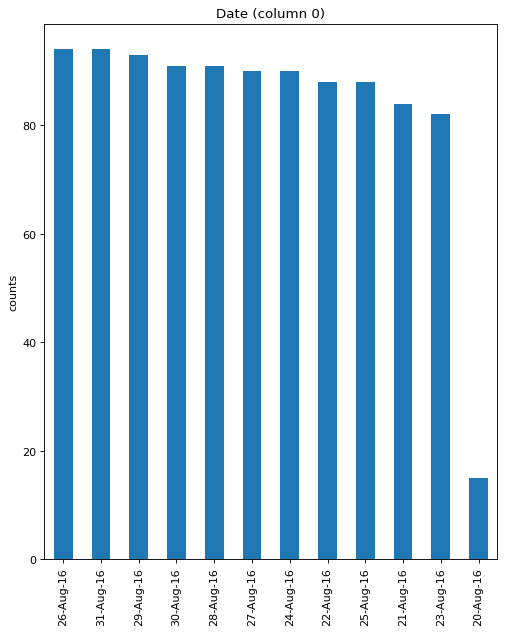

In [11]:
plotPerColumnDistribution(df, 8, 3)

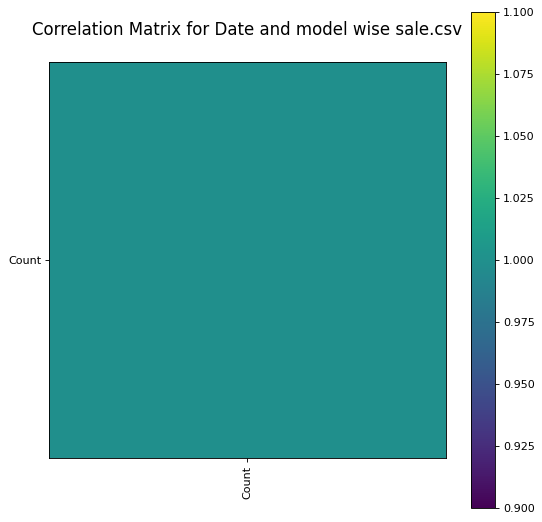

In [12]:
plotCorrelationMatrix(df, 8)

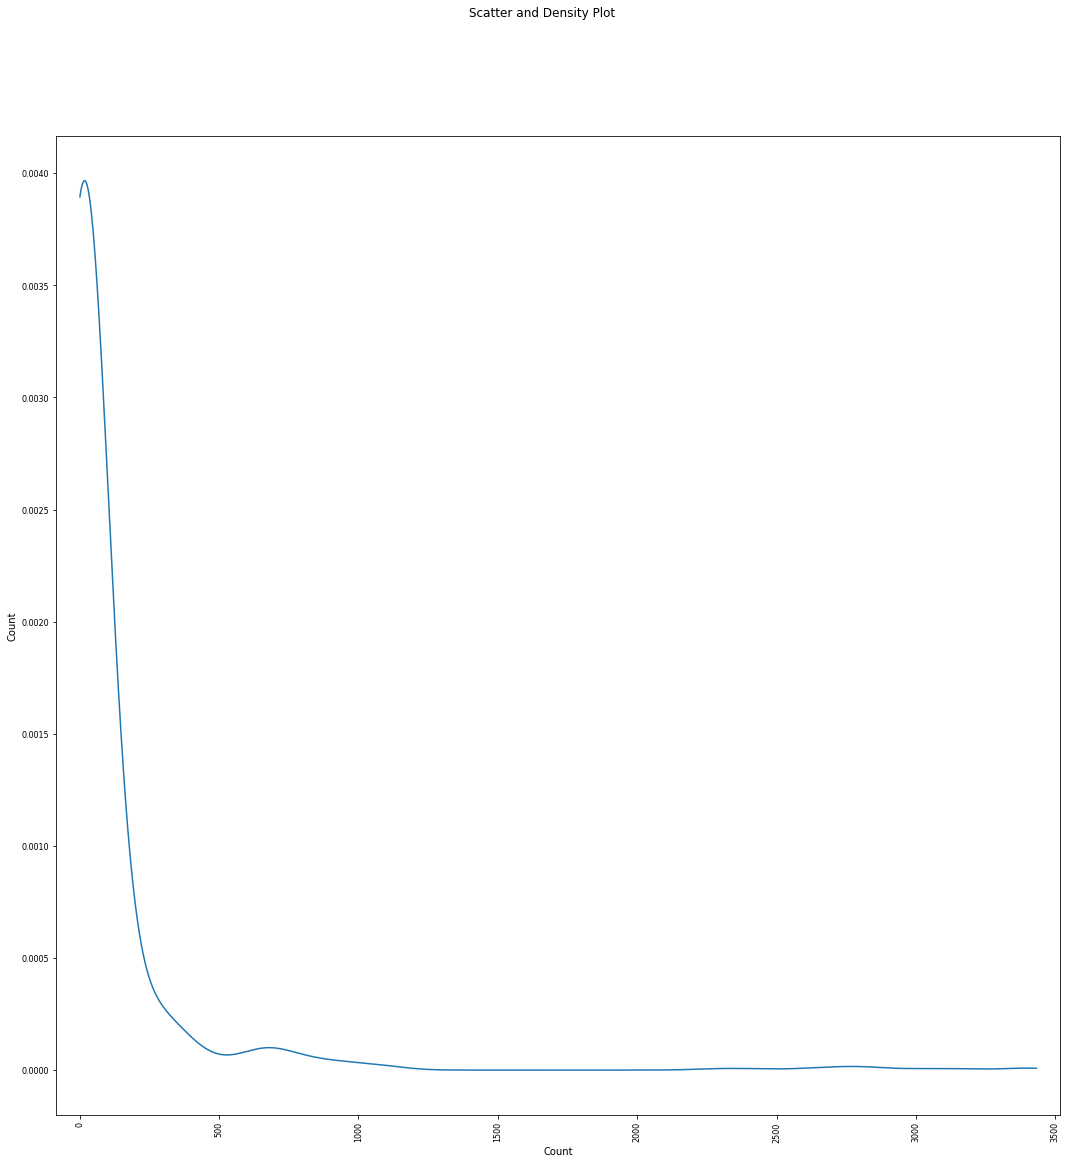

In [13]:
plotScatterMatrix(df, 18, 12)

In [14]:
# Importing libraries in Python
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

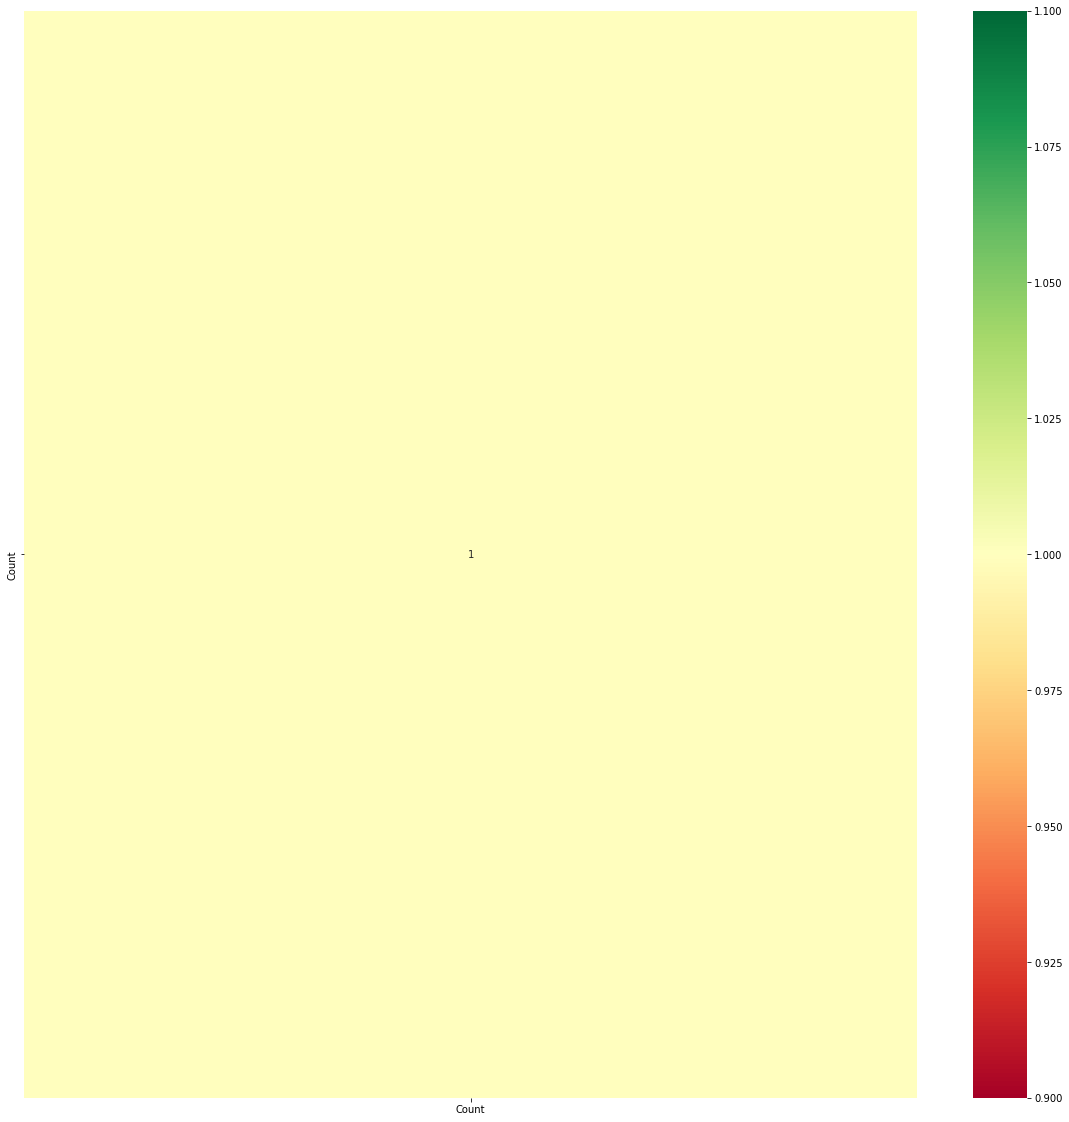

In [15]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [17]:
data = pd.read_csv('/content/drive/MyDrive/TV Sales/Date and model wise sale.csv')

In [18]:
data

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57
...,...,...,...
46111,01-Jan-14,M74,1
46112,01-Jan-14,M59,1
46113,01-Jan-14,M60,5
46114,01-Jan-14,M54,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [20]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Fill missing value
    df['Model'] = df['Model'].fillna(df['Model'].mean())
    
    # One-hot encode the LOCATION_ID column
    location_dummies = pd.get_dummies(df['LOCATION_ID'], prefix='location')
    df = pd.concat([df, location_dummies], axis=1)
    df = df.drop('LOCATION_ID', axis=1)
    
    # Split df into X and y
    y = df['Date']
    X = df.drop('Date', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test